# Yandex Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent 
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

# Git Exercise
In this exercise you will also experience working with github.

You might need to install local python enviroment.
Installation Instruction for ex2 - working on a local python environment:
https://docs.google.com/document/d/1G0rBo36ff_9JzKy0EkCalK4m_ThNUuJ2bRz463EHK9I

## please add the github link of your work below:


example: https://github.com/username/exercise_name

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension. 

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS): 

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset by using the scikit-learn package. hint: [load_boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import sklearn.model_selection
from sklearn import linear_model
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
import scipy.stats

In [99]:
# Load the Boston dataset
X, y = load_boston(return_X_y=True)
p = X.shape[0]
n = X.shape[1]
print('P =',p)
print('N =',n)

P = 506
N = 13


In [91]:
class Ols(object):
  def __init__(self):
    self.w = np.array([1])
    
  @staticmethod
  def pad(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])
  
  def fit(self,X, Y):
    X = self.pad(X)
    self.w = np.linalg.inv(X.T @ X) @ X.T @ Y

  def predict(self, X):
      X = self.pad(X)
      return  X @ self.w
    
  def score(self, X, y_true):
    y_pred = self.predict(X)
    return np.mean(np.sqrt((y_pred - y_true)**2))



Average train MSE: 3.239322010074024
Average test MSE: 3.4351348453303894
t-statistic is: 1.9765074381900563
p-value is: 0.06279648069516852


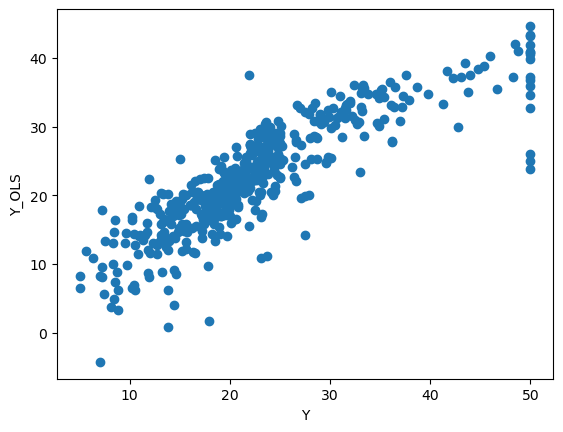

In [108]:

# Plot a scatter plot where on x-axis plot y and in the y-axis Y-ols
model = Ols()
model.fit(X,y)
y_pred = model.predict(X)

plt.scatter(y,y_pred)
plt.xlabel('Y')
plt.ylabel('Y_OLS')


# Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test?
test_MSE = []
train_MSE = []


for i in range(20):
  X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.25,shuffle=True)
  model.fit(X_train,y_train)
  train_MSE.append(model.score(X_train,y_train))
  test_MSE.append(model.score(X_test,y_test))
 
print('Average train MSE:',np.mean(train_MSE))
print('Average test MSE:',np.mean(test_MSE))


t_statistic, p_value = scipy.stats.ttest_rel(test_MSE,train_MSE)

print('t-statistic is:',t_statistic)
print('p-value is:',p_value)

In [93]:
# Write a new class OlsGd which solves the problem using gradinet descent. 
# The class should get as a parameter the learning rate and number of iteration. 
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate? 
# How would you find number of iteration automatically? 
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.
class Normalizer():
  def __init__(self):
    self.mean = np.array([])
    self.std  = np.array([])
    pass
  def fit(self, X):
    self.mean = np.mean(X,axis=0)
    self.std = np.std(X,axis=0)
    pass

  def predict(self, X):
    return (X - self.mean) / self.std
    
class OlsGd(Ols):
  
  def __init__(self, learning_rate=.05, 
               num_iteration=1000, 
               normalize=True,
               early_stop=True,
               verbose=True):
    
    super(OlsGd, self).__init__()
    self.learning_rate = learning_rate
    self.num_iteration = num_iteration
    self.early_stop = early_stop
    self.normalize = normalize
    self.normalizer = Normalizer()    
    self.verbose = verbose
    
  def _fit(self, X, Y, reset=True, track_loss=True):
    loss_list = []
    self.normalizer.fit(X)
    X = self.normalizer.predict(X)
    X = self.pad(X)

    # Initialize weights with random -0.1 - 0.1
    self.w = np.random.uniform(low=-0.1,high=0.1,size=X.shape[1])

    prev_loss = np.Inf
    for i in range(self.num_iteration):
      
      self._step(X,Y)
      curr_loss = (X@self.w - Y)@((X@self.w - Y)) / X.shape[0]
      # Append loss list if track_los = True
      if track_loss:
        loss_list.append(curr_loss)

      # Early stop 
      if prev_loss - curr_loss < 0.01 and self.early_stop: 
        break
      prev_loss = curr_loss

    # If asked to return tack loss
    if track_loss: return loss_list

  def _predict(self, X):
    X = self.normalizer.predict(X)
    X = self.pad(X)
    return X @ self.w
      
  def _step(self, X, Y):
    self.w = self.w - (self.learning_rate * 2 / X.shape[0]) * (X.T @ (X @ self.w - Y)) 
    

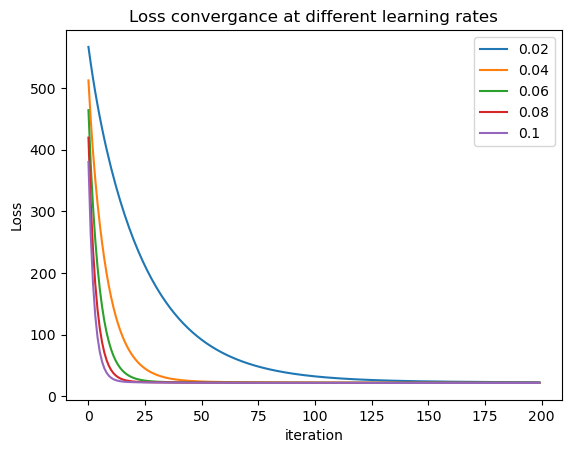

In [94]:
## Plot loss convergance at different learning rates
for i in np.arange(0.01,0.1,0.02):
  model = OlsGd(learning_rate=i,num_iteration=200,early_stop=False)
  loss = model._fit(X,y)
  plt.plot(range(len(loss)),loss)
  plt.xlabel('iteration')
  plt.ylabel('Loss')

plt.legend(np.arange(0.02,0.12,0.02))
plt.title("Loss convergance at different learning rates");

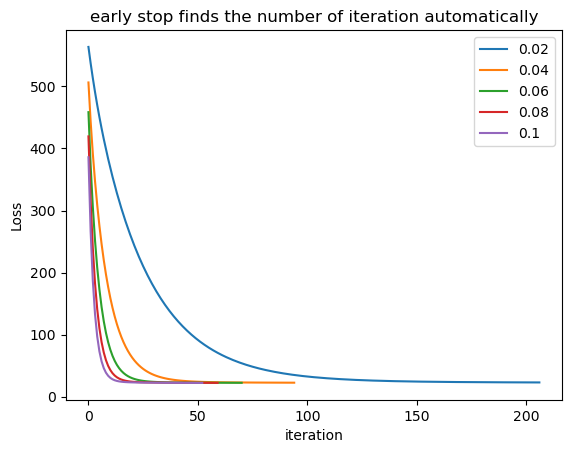

In [95]:

## Plot loss convergance at different learning rates
for i in np.arange(0.01,0.1,0.02):
  model = OlsGd(learning_rate=i)
  loss = model._fit(X,y)
  plt.plot(range(len(loss)),loss)
  plt.xlabel('iteration')
  plt.ylabel('Loss')

plt.legend(np.arange(0.02,0.12,0.02))
plt.title("early stop finds the number of iteration automatically");

## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation? 



## Derivative proof
$L(y,\hat{y}) = RSS + λ(w^Tw) = (y - Xw)^2 - λ(w^Tw) =$        
 
$(y-Xw)^T(y-Xw) -  λ (w^Tw) =  y^Ty -2(w^TX^Ty) + w^TX^TXw -  λ(w^Tw)$

$\frac{\partial{L_{loss}}}{\partial{w}} = -2(X^Ty) +2(X^TXw) - 2λw$

$\frac{\partial{L_{loss}}}{\partial{w}}  = 0 :   -2 (X^Ty) +2(X^TXw) - 2λw  = 0$     &rarr;     $X^Ty = X^TXw + λw$ &rarr;  $X^Ty  = (X^TX + λI)w$ 

$w = (X^TX + λI)^{-1}  (X^Ty)$


In [96]:
class RidgeLs(Ols):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLs,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda
    
  def _fit(self, X, Y):
    X = self.pad(X)
    self.w = np.linalg.inv(X.T @ X + self.ridge_lambda * np.eye(X.shape[1])) @ (X.T@Y)

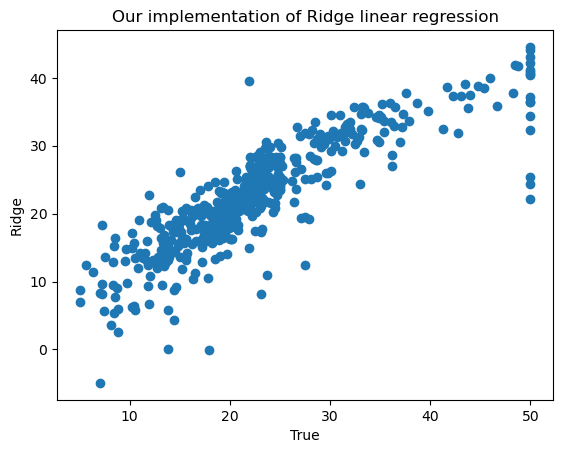

In [115]:
model = RidgeLs(0.5)
model._fit(X,y)
y_pred = model.predict(X)

plt.scatter(y,y_pred)
plt.ylabel('Ridge')
plt.xlabel('True');
plt.title("Our implementation of Ridge linear regression");

### Use scikitlearn implementation for OLS, Ridge and Lasso

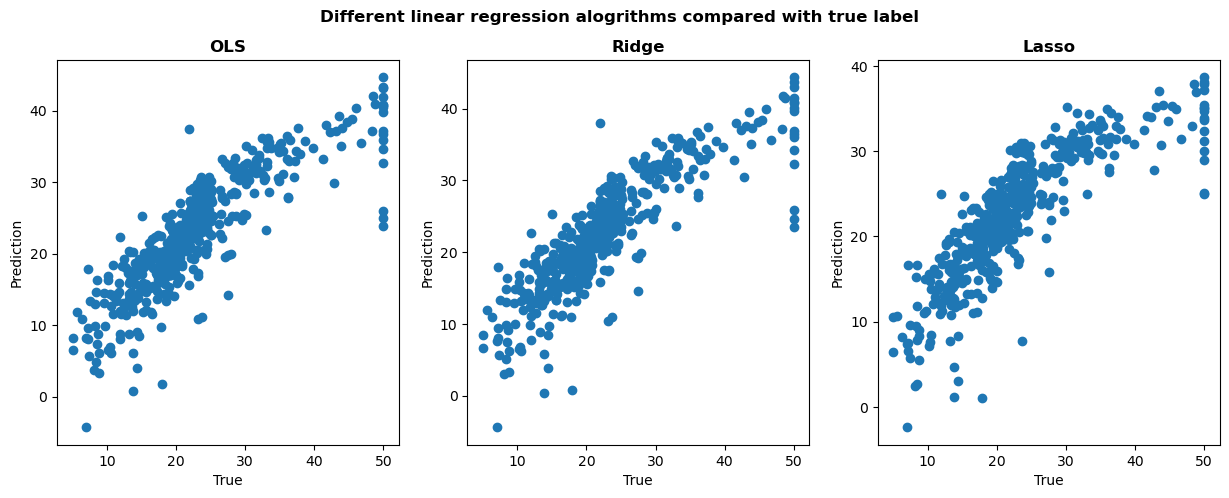

In [ ]:
plt.figure(figsize=(15,5))
### SKlearn OLS
plt.subplot(1,3,1)
plt.scatter(y,linear_model.LinearRegression().fit(X,y).predict(X))
plt.ylabel('Prediction')
plt.xlabel('True')
plt.title("OLS",fontweight='bold')
###

## SKlearn Ridge 
plt.subplot(1,3,2)
plt.scatter(y,linear_model.Ridge().fit(X,y).predict(X))
plt.ylabel('Prediction')
plt.xlabel('True')
plt.title("Ridge",fontweight='bold')

## SKlearn Lasso
plt.subplot(1,3,3)
plt.scatter(y,linear_model.Lasso().fit(X,y).predict(X))
plt.ylabel('Prediction')
plt.xlabel('True');
plt.title("Lasso",fontweight='bold')

plt.suptitle("Different linear regression alogrithms compared with true label",fontweight="bold");